## Adult Income Classification

Data source: https://www.kaggle.com/datasets/wenruliu/adult-income-dataset/data

Features:

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- class: >50K, <=50K

### 1. Imports

In [1]:
# Import modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import warnings 
warnings.filterwarnings('ignore')

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_absolute_error
from sklearn.metrics import roc_curve, auc, precision_recall_curve

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier


### 2. Load data

In [2]:
income = pd.read_csv('./adult.csv')

In [3]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
income.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### 3. Explore the data

As we can see, some of those "?" are missing values. Replace "?" with np.NaN.

In [5]:
replace_list = list(income.columns)
for item in replace_list:
    income[item] = income[item].replace("?", np.NaN)

In [6]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
# Count missing values and sort.
missing = pd.concat([income.isnull().sum(), 100 * income.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='%', ascending=False)

,count,%
occupation,2809,5.751198
workclass,2799,5.730724
native-country,857,1.754637
age,0,0.000000
fnlwgt,0,0.000000
education,0,0.000000
educational-num,0,0.000000
marital-status,0,0.000000
relationship,0,0.000000
race,0,0.000000


Missing values handling.

In [8]:
# Drop rows with missing value in 'native-country', as it's below 5% occurance.
income.dropna(subset=['native-country'], inplace=True)

As the rest two missing value features are both categorical, most frequent value will be used to impute the missing values.

In [9]:
impute_columns = ['workclass', 'occupation']
cat_imputer = SimpleImputer(strategy='most_frequent')
income[impute_columns] = cat_imputer.fit_transform(income[impute_columns])

In [10]:
income.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [11]:
# Check duplicates row number
income.duplicated().sum()

52

In [12]:
# Remove duplicates
income.drop_duplicates(inplace=True)

In [13]:
income.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47933 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              47933 non-null  int64 
 1   workclass        47933 non-null  object
 2   fnlwgt           47933 non-null  int64 
 3   education        47933 non-null  object
 4   educational-num  47933 non-null  int64 
 5   marital-status   47933 non-null  object
 6   occupation       47933 non-null  object
 7   relationship     47933 non-null  object
 8   race             47933 non-null  object
 9   gender           47933 non-null  object
 10  capital-gain     47933 non-null  int64 
 11  capital-loss     47933 non-null  int64 
 12  hours-per-week   47933 non-null  int64 
 13  native-country   47933 non-null  object
 14  income           47933 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.9+ MB


Do we need to remove duplicates, or not?

In [14]:
income.describe().T

,count,mean,std,min,25%,50%,75%,max
age,47933.0,38.650658,13.727594,17.0,28.0,37.0,48.0,90.0
fnlwgt,47933.0,189595.865750,105773.293158,12285.0,117362.0,178074.0,237713.0,1490400.0
educational-num,47933.0,10.068074,2.559379,1.0,9.0,10.0,12.0,16.0
capital-gain,47933.0,1068.189661,7377.171285,0.0,0.0,0.0,0.0,99999.0
capital-loss,47933.0,87.465337,402.889543,0.0,0.0,0.0,0.0,4356.0
hours-per-week,47933.0,40.415038,12.392383,1.0,40.0,40.0,45.0,99.0


In [15]:
income.describe(include='object').T

,count,unique,top,freq
workclass,47933,8,Private,36010
education,47933,16,HS-grad,15573
marital-status,47933,7,Married-civ-spouse,21957
occupation,47933,14,Craft-repair,8768
relationship,47933,6,Husband,19357
race,47933,5,White,41140
gender,47933,2,Male,32005
native-country,47933,41,United-States,43792
income,47933,2,<=50K,36472


In [16]:
income['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', '5th-6th',
       'Assoc-voc', '9th', 'Doctorate', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [17]:
income['educational-num'].unique()

array([ 7,  9, 12, 10,  6, 15,  4, 13, 14,  3, 11,  5, 16,  8,  2,  1],
      dtype=int64)

As 'education' and 'educational-num' features are correlated to each other, for example, 'Preschool' same as '1', and 'Doctorate' same as '16'. 'education' column can be dropped.
It seems there are many "0" in 'capital-gain' and 'capital-loss', let's check the percentage of 0 in them.

In [18]:
print("number of 0 in 'capital-gain': ", np.sum(income['capital-gain'] == 0))
print(f"Percentage: {np.sum(income['capital-gain'] == 0) / len(income) :.3f}")
print("number of 0 in 'capital-loss': ", np.sum(income['capital-loss'] == 0))
print(f"Percentage: {np.sum(income['capital-loss'] == 0) / len(income) :.3f}")

number of 0 in 'capital-gain':  43972
Percentage: 0.917
number of 0 in 'capital-loss':  45694
Percentage: 0.953


In [19]:
# Majority of 'capital-gain' and 'capital-loss' are 0, they can be dropped together with 'education'.
income.drop(['education', 'capital-gain', 'capital-loss'], axis=1, inplace=True)

In [20]:
income.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47933 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              47933 non-null  int64 
 1   workclass        47933 non-null  object
 2   fnlwgt           47933 non-null  int64 
 3   educational-num  47933 non-null  int64 
 4   marital-status   47933 non-null  object
 5   occupation       47933 non-null  object
 6   relationship     47933 non-null  object
 7   race             47933 non-null  object
 8   gender           47933 non-null  object
 9   hours-per-week   47933 non-null  int64 
 10  native-country   47933 non-null  object
 11  income           47933 non-null  object
dtypes: int64(4), object(8)
memory usage: 4.8+ MB


In [21]:
income.select_dtypes(include='int64').columns

Index(['age', 'fnlwgt', 'educational-num', 'hours-per-week'], dtype='object')

In [22]:
income.select_dtypes(include='object').columns

Index(['workclass', 'marital-status', 'occupation', 'relationship', 'race',
       'gender', 'native-country', 'income'],
      dtype='object')

In [23]:
# Check 'income' values and percentages.
print(income['income'].value_counts())
print(f'<=50K percentage: {np.sum(income['income']=='<=50K') / len(income) :.3f}')
print(f'>50K percentage: {np.sum(income['income']=='>50K') / len(income) :.3f}')

income
<=50K    36472
>50K     11461
Name: count, dtype: int64
<=50K percentage: 0.761
>50K percentage: 0.239


'income' is not a very imblanced class. If having more time, re-sampling could be tried as well later on.

Distribution of numeric features by 'income' class.

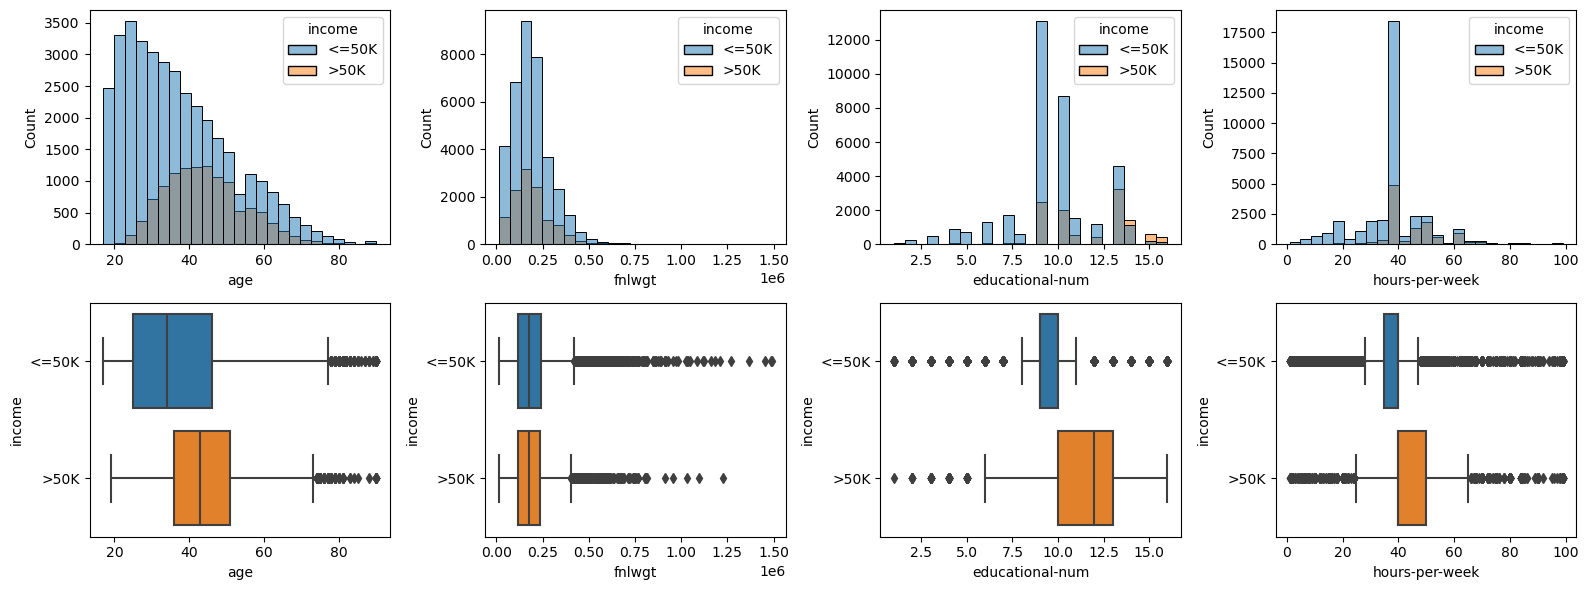

In [24]:
# Create histogram and boxplots of numeric features grouped by 'income' categories
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(16, 6))

# Loop through each column and plot the histograms
for i, colname in enumerate(income.select_dtypes(include='int64').columns):
    col = i % 4
    
    sns.histplot(data=income, x=colname, hue='income', bins=25, alpha=0.5, ax=ax[0, col])
    ax[0, col].set_xlabel(colname)

    sns.boxplot(data=income, x=colname, y='income', ax=ax[1, col])
    ax[1, col].set_xlabel(colname)
    ax[1, col].set_ylabel('income')

# Adjust the layout and show plots
plt.tight_layout()
plt.show()

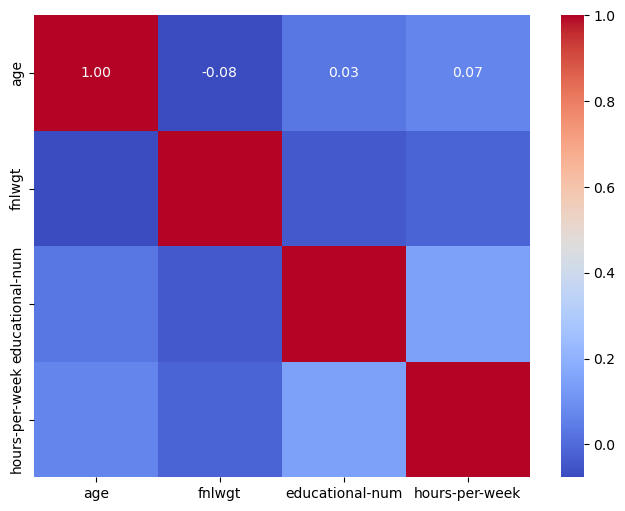

In [25]:
# Correlation matrix heatmap of numeric features
plt.subplots(figsize=(8, 6))
sns.heatmap(income.select_dtypes(include='int64').corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

Not too much corelation between numeric features.

In [26]:
income.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
4,18,Private,103497,10,Never-married,Craft-repair,Own-child,White,Female,30,United-States,<=50K


Distribution of categorical features by 'income' class.

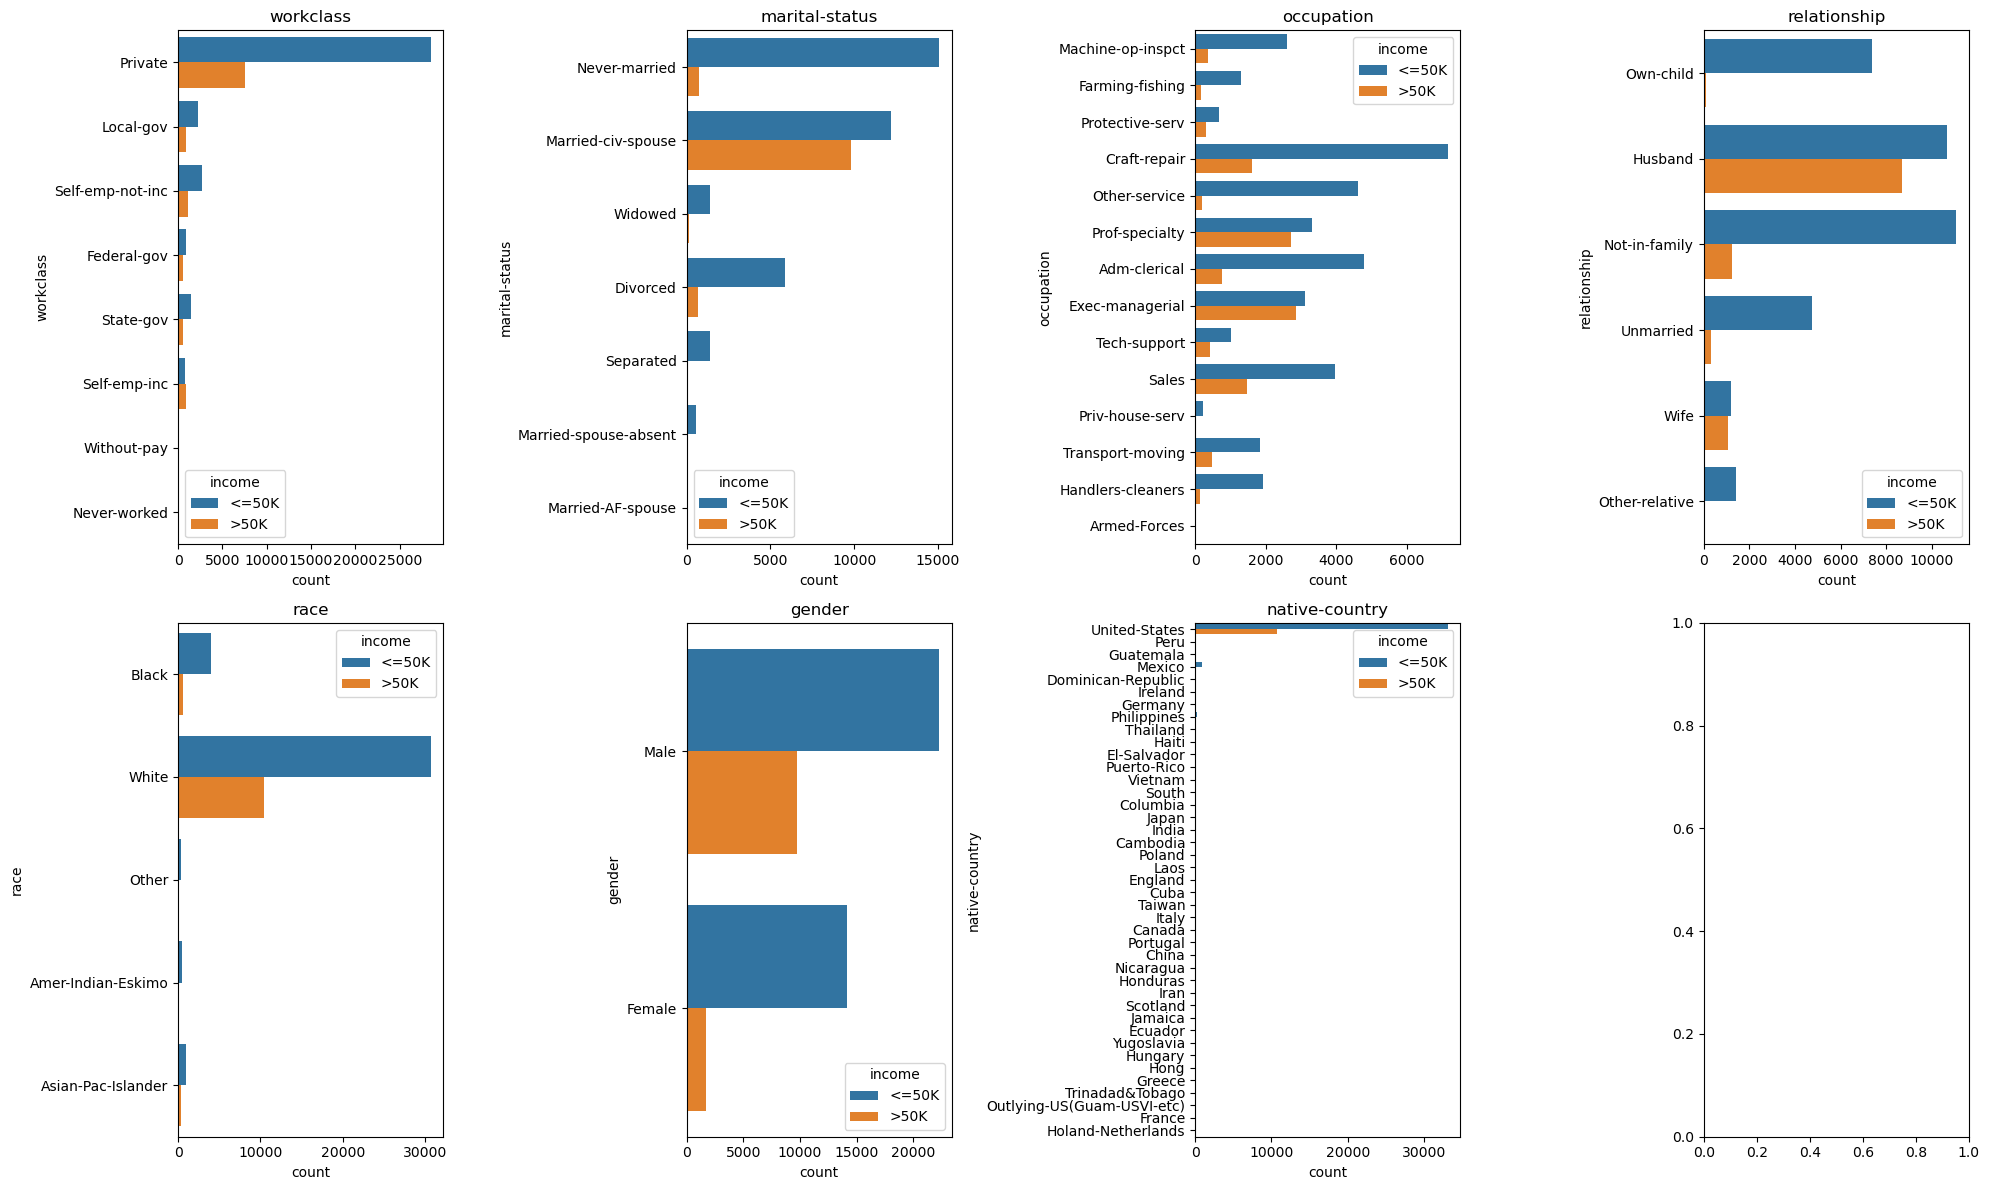

In [27]:
# Draw plots of categorical features counts by 'income' class
fig, axs = plt.subplots(2, 4, figsize=(20, 12))

for i, col in enumerate(income.select_dtypes(include='object').columns[:-1]):
    row = i // 4
    pos = i % 4

    sns.countplot(data=income, y=col, hue='income', ax=axs[row, pos])
    axs[row, pos].set_title(col)

plt.tight_layout()
plt.show()

Convert categorical features to numeric.

In [28]:
# Convert categorical data into numeric
for colname in income.select_dtypes(include='object').columns:
    lb = LabelEncoder()
    income[colname] = lb.fit_transform(income[colname])

In [29]:
income.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,3,226802,7,4,6,3,2,1,40,38,0
1,38,3,89814,9,2,4,0,4,1,50,38,0
2,28,1,336951,12,2,10,0,4,1,40,38,1
3,44,3,160323,10,2,6,0,2,1,40,38,1
4,18,3,103497,10,4,2,3,4,0,30,38,0


### 4. Modeling

In [30]:
# Fit and transform features with StandardScaler.
scaler = StandardScaler()
X = income.drop(columns='income')
y = income.income
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=scaler.get_feature_names_out())
X_scaled.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country
0,-0.994406,-0.088721,0.351757,-1.198770,0.916458,0.064232,0.971092,-2.002410,0.705459,-0.033492,0.261878
1,-0.047398,-0.088721,-0.943366,-0.417322,-0.407729,-0.433640,-0.901162,0.387181,0.705459,0.773464,0.261878
2,-0.775866,-1.887264,1.393137,0.754849,-0.407729,1.059976,-0.901162,0.387181,0.705459,-0.033492,0.261878
3,0.389682,-0.088721,-0.276754,-0.026598,-0.407729,0.064232,-0.901162,-2.002410,0.705459,-0.033492,0.261878
4,-1.504333,-0.088721,-0.814003,-0.026598,0.916458,-0.931511,0.971092,0.387181,-1.417517,-0.840447,0.261878


In [31]:
# split dataset into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=47)

In [32]:
X_train.shape, X_test.shape

((33553, 11), (14380, 11))

In [33]:
y_train.shape, y_test.shape

((33553,), (14380,))

In [34]:
# Initialize a DataFrame to save model name and metrics
table = pd.DataFrame(columns=['model_name', 'Accuracy_score', 'Precision_score', 'Recall_score', 'F1_score', 'roc_auc_score', 'pr_auc', 'Mean_absolute_error'])

# Function to calculate metrics and return a dictionary
def calculate_metrics(model_name, y_test, y_pred, y_score):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_score)
    Mean_absolute_error = mean_absolute_error(y_test, y_pred)
    
    # Compute the precision-recall curve
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_score)
    pr_auc = auc(recall_curve, precision_curve)
    
    # Return a dictionary with the results
    return {
        'model_name': model_name,
        'Accuracy_score': accuracy,
        'Precision_score': precision,
        'Recall_score': recall,
        'F1_score': f1,
        'roc_auc_score': roc_auc,
        'pr_auc': pr_auc,
        'Mean_absolute_error': Mean_absolute_error
    }

In [35]:
# Define plot_roc_pr_curves function to draw ROC and Precision_Recall curves
def plot_roc_pr_curves(model_name, y_test, y_score):
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_score)

    # Compute Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_score)

    # Create a figure with 2 subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Plot ROC curve on the first subplot
    ax1.plot([0, 1], [0, 1], linestyle='--')
    ax1.plot(fpr, tpr, marker='.', markersize=1.5, label=model_name)
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title(f'ROC Curve - {model_name}')
    ax1.legend()

    # Plot Precision-Recall curve on the second subplot
    # ax2.plot([0, 1], [1, 0], linestyle='--')
    ax2.plot(recall, precision, marker='.', markersize=1.5, label=model_name)
    ax2.set_xlabel('Recall')
    ax2.set_ylabel('Precision')
    ax2.set_title(f'Precision-Recall Curve - {model_name}')
    ax2.legend()

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()

#### 4.1 KNN

In [36]:
# Apply KNN model to the training data
knn = KNeighborsClassifier(n_neighbors=10, weights='distance', p=2, n_jobs=-1)
knn.fit(X_train, y_train)

# Predict and save to y_pred
y_pred = knn.predict(X_test)
y_score = knn.predict_proba(X_test)[:, 1]

# Calculate metrics and store them in a dictionary
metrics = calculate_metrics('KNN', y_test, y_pred, y_score)

# Append the metrics as a new row to the DataFrame using pd.concat
table = pd.concat([table, pd.DataFrame([metrics])], ignore_index=True)

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Print score values
table

[[9844 1144]
 [1471 1921]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88     10988
           1       0.63      0.57      0.60      3392

    accuracy                           0.82     14380
   macro avg       0.75      0.73      0.74     14380
weighted avg       0.81      0.82      0.81     14380



,model_name,Accuracy_score,Precision_score,Recall_score,F1_score,roc_auc_score,pr_auc,Mean_absolute_error
0,KNN,0.81815,0.626754,0.566333,0.595013,0.854048,0.642406,0.18185


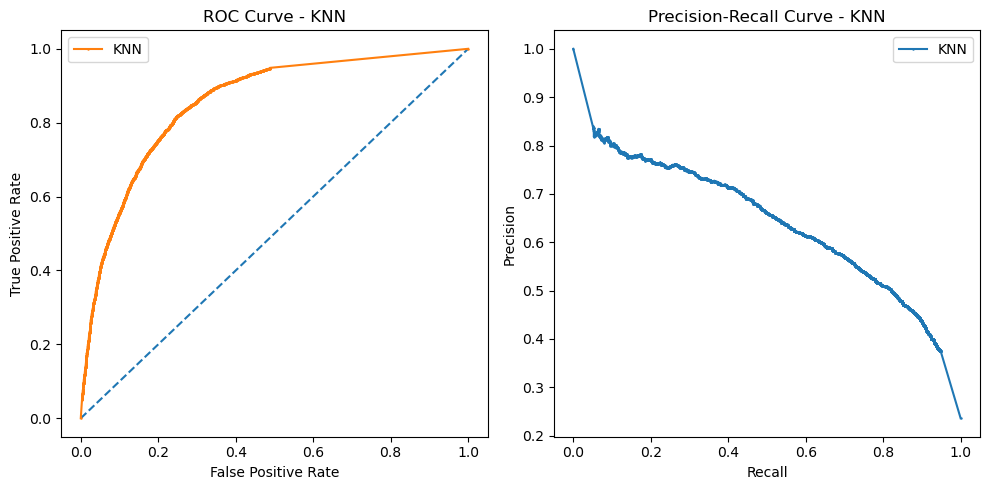

In [37]:
# Draw ROC and Precision-Recall Curves for Random Forest
plot_roc_pr_curves("KNN", y_test, y_score)

#### 4.2 Gradient Boost

In [38]:
gbc = GradientBoostingClassifier(learning_rate=0.1, subsample=1, max_depth=10, random_state=47)
gbc.fit(X_train, y_train)

# Predict and save to y_pred
y_pred = gbc.predict(X_test)
y_score = gbc.predict_proba(X_test)[:, 1]

# Calculate metrics and store them in a dictionary
metrics = calculate_metrics('Gradient Boosting', y_test, y_pred, y_score)

# Append the metrics as a new row to the DataFrame using pd.concat
table = pd.concat([table, pd.DataFrame([metrics])], ignore_index=True)

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Print score values
table

[[9978 1010]
 [1457 1935]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     10988
           1       0.66      0.57      0.61      3392

    accuracy                           0.83     14380
   macro avg       0.76      0.74      0.75     14380
weighted avg       0.82      0.83      0.82     14380



,model_name,Accuracy_score,Precision_score,Recall_score,F1_score,roc_auc_score,pr_auc,Mean_absolute_error
0,KNN,0.818150,0.626754,0.566333,0.595013,0.854048,0.642406,0.181850
1,Gradient Boosting,0.828442,0.657046,0.570460,0.610699,0.879815,0.672613,0.171558


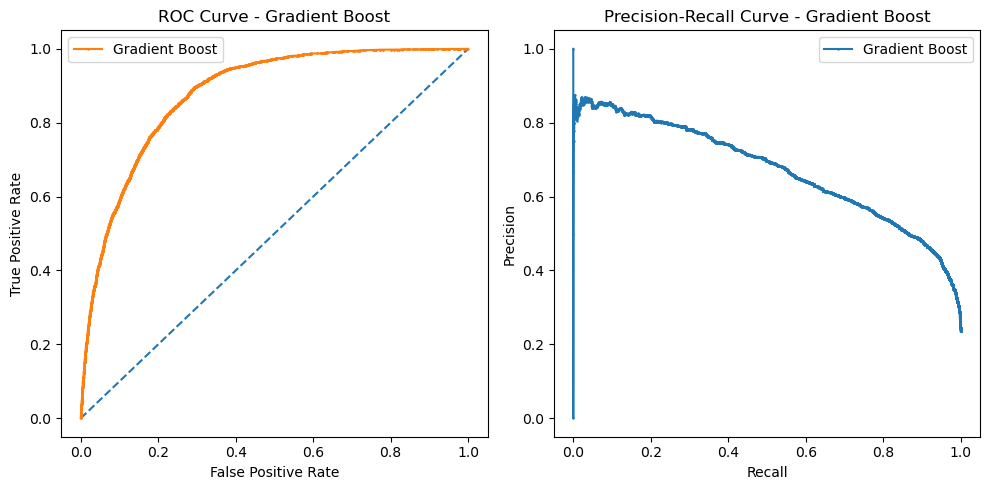

In [39]:
# Draw ROC and Precision-Recall Curves for Random Forest
plot_roc_pr_curves("Gradient Boost", y_test, y_score)

#### 4.3 Random Forest

In [40]:
# Apply RandomForestClassifier to training data
rfc = RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_split=2, max_features=4, random_state=47, n_jobs=-1)
rfc.fit(X_train, y_train)

# Predict and save to y_pred
y_pred = rfc.predict(X_test)
y_score = rfc.predict_proba(X_test)[:, 1]

# Calculate metrics and store them in a dictionary
metrics = calculate_metrics('Random Forest', y_test, y_pred, y_score)

# Append the metrics as a new row to the DataFrame using pd.concat
table = pd.concat([table, pd.DataFrame([metrics])], ignore_index=True)

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Print score values
table

[[10296   692]
 [ 1688  1704]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     10988
           1       0.71      0.50      0.59      3392

    accuracy                           0.83     14380
   macro avg       0.79      0.72      0.74     14380
weighted avg       0.82      0.83      0.82     14380



,model_name,Accuracy_score,Precision_score,Recall_score,F1_score,roc_auc_score,pr_auc,Mean_absolute_error
0,KNN,0.818150,0.626754,0.566333,0.595013,0.854048,0.642406,0.181850
1,Gradient Boosting,0.828442,0.657046,0.570460,0.610699,0.879815,0.672613,0.171558
2,Random Forest,0.834492,0.711185,0.502358,0.588804,0.886219,0.694320,0.165508


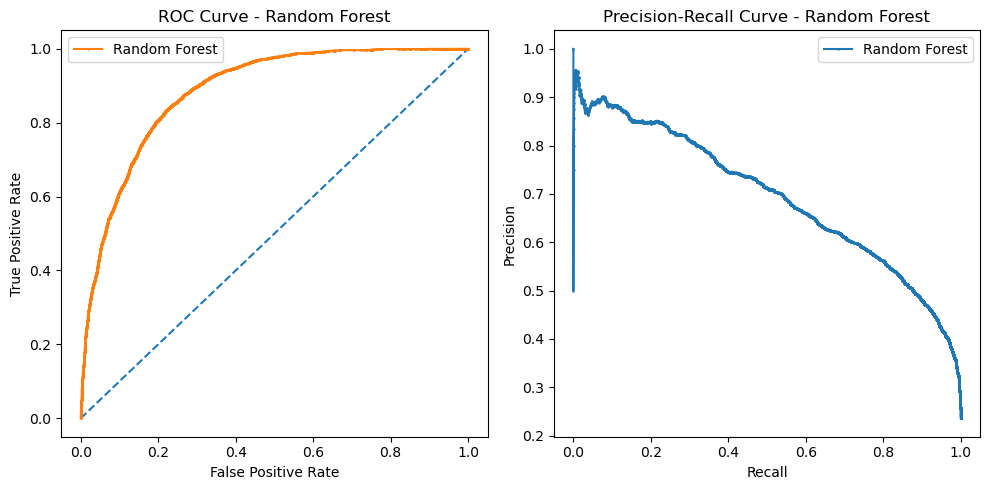

In [41]:
# Draw ROC and Precision-Recall Curves for Random Forest
plot_roc_pr_curves("Random Forest", y_test, y_score)

Of the above 3 models tried, Random Forest had the best accuricy score 0.834, and smallest Mean_absolute_error 0.166.


In [42]:
# Check Random Forest accuracy score in training and test data sets.
print(f'Random Forest accuracy score of training data: {accuracy_score(y_train, rfc.predict(X_train)) :.3f}')
print(f'Random Forest accuracy score of test data: {accuracy_score(y_test, rfc.predict(X_test)) :.3f}')

Random Forest accuracy score of training data: 0.846
Random Forest accuracy score of test data: 0.834


The performance is close in training data dna test data, so the overfitting problem is not too big. Still, to handle possible overfitting and improve, hyperparameters search with CV may be run if having more time.

Feature importance in Random Forest model.

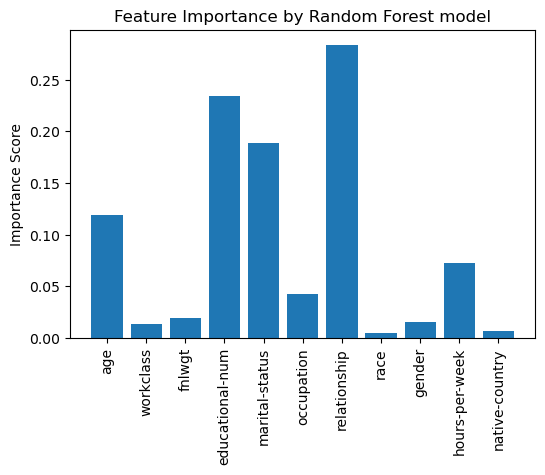

In [43]:
plt.figure(figsize=(6, 4))
plt.bar(income.drop(columns='income').columns, rfc.feature_importances_)
plt.ylabel('Importance Score')
plt.title("Feature Importance by Random Forest model")
plt.xticks(rotation=90)
plt.show()